# FLOOD PREDICTION
This Machine Learning Model uses 3 Machine Learning Algorithms namely KNN Classification, Logistic Regression and Random Forest to get the best possible model to predict the floods using Kerela Rainfall Data.

# Import the Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [53]:
data = pd.read_csv("kerala.csv")
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


# Data Exploration and Pre-Processing

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [55]:
data.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [56]:
data['SUBDIVISION'].value_counts()

KERALA     117
KERALA       1
Name: SUBDIVISION, dtype: int64

In [57]:
data.mean()

YEAR                1959.500000
JAN                   12.218644
FEB                   15.633898
MAR                   36.670339
APR                  110.330508
MAY                  228.644915
JUN                  651.617797
JUL                  698.220339
AUG                  430.369492
SEP                  246.207627
OCT                  293.207627
NOV                  162.311017
DEC                   40.009322
 ANNUAL RAINFALL    2925.405085
dtype: float64

In [58]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [59]:
data.shape

(118, 16)

In [64]:
# replacing the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

# DATA VISUALIZATION

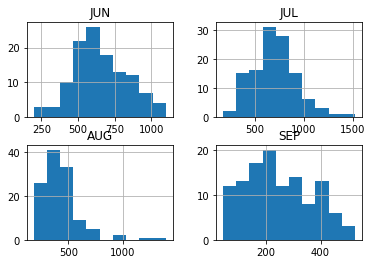

In [60]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()


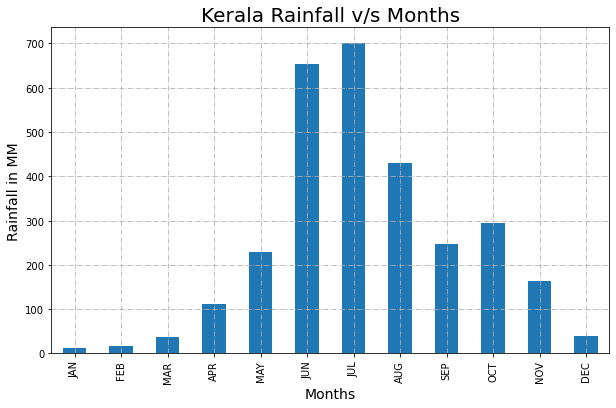

In [61]:
plt.figure(figsize=(10,6))
Kerala[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("Kerala Rainfall v/s Months",size=20)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

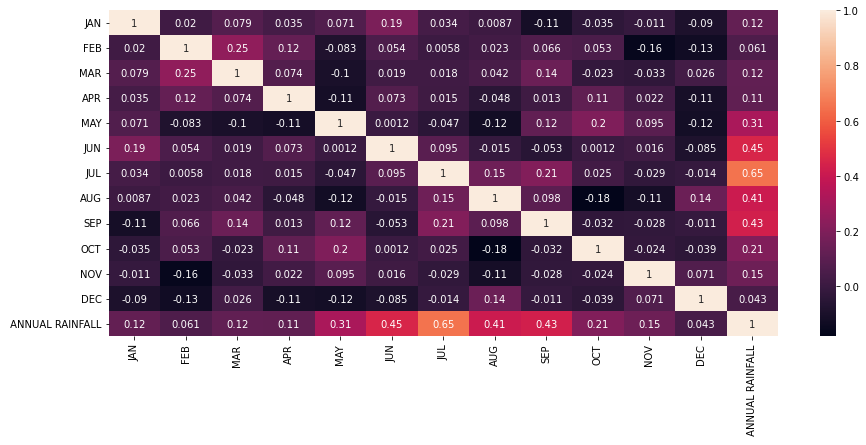

In [107]:
plt.figure(figsize=(15,6))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC',' ANNUAL RAINFALL']].corr(),annot=True)
plt.show()

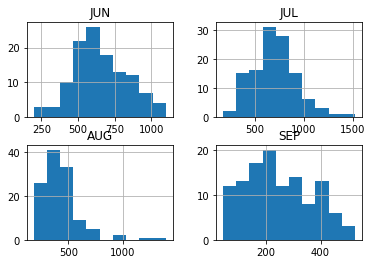

In [108]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

# Train | Test Split and Scaling

In [149]:
# Seperating the data which we are gonna use for prediction.
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [150]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [153]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# KNN classifier

In [155]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(scaled_X_train,y_train)
y_pred = model.predict(scaled_X_test)

In [177]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10,  1],
       [ 5,  8]], dtype=int64)

In [178]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.89      0.62      0.73        13

    accuracy                           0.75        24
   macro avg       0.78      0.76      0.75        24
weighted avg       0.79      0.75      0.75        24



In [179]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))


Accuracy Score: 0.75


# Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
model1=LogisticRegression()
model1.fit(scaled_X_train,y_train)

LogisticRegression()

In [169]:
y_pred1 = lr.predict(scaled_X_test)

In [171]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.92      0.96        13

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



In [170]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred1))


Accuracy Score: 0.9583333333333334


# Random Forest classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model2.fit(scaled_X_train,y_train)
preds = model.predict(scaled_X_test)

In [192]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,preds)


array([[10,  1],
       [ 1, 12]], dtype=int64)

In [193]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        13

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



In [194]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,preds))

Accuracy Score: 0.9166666666666666


In [195]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
names = []
scores = []
for name, model in models:
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

,Name,Score
0,KNN,0.750000
1,LR,0.958333
2,RF,0.833333


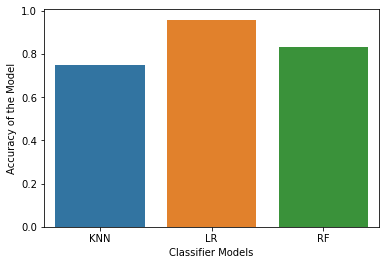

In [196]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')   
plt.show()

In [197]:
tr_split['Score'].max()

0.9583333333333334

Logistic Regression is performing better compared to Random Forest and KNN classifier.